In [166]:
import mglearn
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score                         # 교차 검증
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF

import warnings
warnings.simplefilter('ignore')

#### EX1. data-01

In [2]:
df = pd.read_csv( 'data4/data-01.csv', header=None )
df.columns = ['q1', 'q2', 'mid', 'final']
df.head()

,q1,q2,mid,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [3]:
x_data = df.iloc[:, :-1]

In [110]:
df[ ['mid', 'q1'] ].head()

,mid,q1
0,75,73
1,93,93
2,90,89
3,100,96
4,70,73


In [109]:
df[ df.columns.difference(['final']) ].head()

,mid,q1,q2
0,75,73,80
1,93,93,88
2,90,89,91
3,100,96,98
4,70,73,66


In [6]:
y_data = df.iloc[:, -1]

In [7]:
model = LinearRegression()
model.fit( x_data, y_data )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
model.coef_

array([0.35593822, 0.54251876, 1.16744422])

In [9]:
model.intercept_

-4.3361024012403675

#### q1:70점, q2:75점 mid:75점인 경우 예측값을 구하시오.

In [10]:
model.coef_[0]*70 + model.coef_[1]*75 +model.coef_[2]*75 + model.intercept_

148.8267959476565

In [11]:
np.matmul( [ [70,75,75] ], model.coef_.reshape(-1, 1) ) + model.intercept_

array([[148.82679595]])

#### < Reference > 
: **reshape()** 의 '-1'이 의미하는 바는, 변경된 배열의 '-1' 위치의 차원은 "원래 배열의 길이와 남은 차원으로 부터 추정"이 된다는 뜻입니다. (One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions.)


In [12]:
model.predict( [[70, 75, 75]] )

array([148.82679595])

#### q1:60점 q2:55점 mid:65점, q1:90점 q2:85점 mid:95점 인 경우 예측값을 구하시오.

In [13]:
model.predict( [[60, 55, 65], [90, 85, 95]] )

array([122.74259645, 184.71963222])

In [14]:
_ = np.array( [60,55,65,90,85,95] ).reshape(2, -1)
_ = pd.DataFrame(_)
model.predict(_)

array([122.74259645, 184.71963222])

#### 결정 계수( $ \text{R}^2 $  : Coefficient of determination )

In [15]:
model.score( x_data, y_data )

0.98966157894484

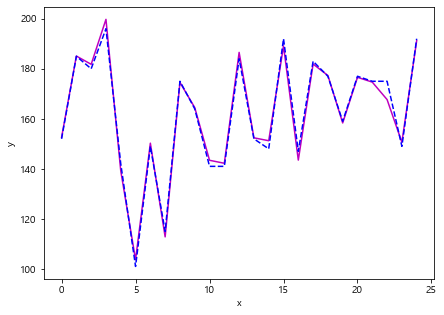

In [16]:
plt.figure( figsize=(7,5))
plt.xlabel('x');plt.ylabel('y')
plt.plot( model.predict(x_data), color='m' )
plt.plot( y_data, 'b--' )
plt.show()

#### Ex2. Boston dataset

In [17]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [21]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
len( boston_df.columns ), len( boston_df )

(14, 506)

In [23]:
x_data = boston_df.iloc[:,:-1]
y_data = boston_df.iloc[:, -1]

In [24]:
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2, random_state=1 )
print(f'x_train shape: { x_train.shape } ')
print(f'x_test shape:  { x_test.shape } ' )
print(f'y_train shape: { x_train.shape } ')
print(f'y_test shape:  { x_test.shape } ' )

x_train shape: (404, 13) 
x_test shape:  (102, 13) 
y_train shape: (404, 13) 
y_test shape:  (102, 13) 


In [25]:
modelBoston = LinearRegression()
modelBoston.fit( x_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### train data 보다 test data가 현저히 적으면 과대적합

In [26]:
print(f'훈련 데이터 R2 : { modelBoston.score( x_train, y_train ) }' )
print(f'테스트 데이터 R2 : { modelBoston.score( x_test, y_test ) }' )

훈련 데이터 R2 : 0.7293585058196337
테스트 데이터 R2 : 0.7634174432138463


In [27]:
x_test.iloc[0]

CRIM         0.04932
ZN          33.00000
INDUS        2.18000
CHAS         0.00000
NOX          0.47200
RM           6.84900
AGE         70.30000
DIS          3.18270
RAD          7.00000
TAX        222.00000
PTRATIO     18.40000
B          396.90000
LSTAT        7.53000
Name: 307, dtype: float64

In [28]:
y_test.iloc[0]

28.2

In [29]:
modelBoston.predict( [x_test.iloc[0]] )

array([32.65503184])

#### 학습에 의한 방법과 딥러닝을 통한 방법을 통해 Train set, Test set   $\; \text{R}^2 $  값을 구하시오.

#### 학습(Learning)을 통한 다중회귀

In [30]:
modelSGD = SGDRegressor( max_iter = 100, alpha=0.0001, early_stopping=True, verbose=1 )
modelSGD.fit( x_train, y_train  )

-- Epoch 1
Norm: 1531235745220.27, NNZs: 13, Bias: 10039635410.707159, T: 363, Avg. loss: 176931105649824262448035659776.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1979498291784.63, NNZs: 13, Bias: 7129866596.597542, T: 726, Avg. loss: 81601683810161759613936992256.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1571565207367.66, NNZs: 13, Bias: 9167311983.021114, T: 1089, Avg. loss: 67084537909859336631789551616.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2138380669422.73, NNZs: 13, Bias: 10849388293.805216, T: 1452, Avg. loss: 51449809874938516120392433664.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1322224248733.93, NNZs: 13, Bias: 20070516806.366158, T: 1815, Avg. loss: 48355819014052707511629250560.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1099100130829.04, NNZs: 13, Bias: 19016762085.631607, T: 2178, Avg. loss: 42714575560942253778334121984.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 11515644

SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [31]:
print(f'훈련 데이터 R2 : { modelSGD.score( x_train , y_train ) }' )
print(f'테스트 데이터 R2 : { modelSGD.score( x_test , y_test ) }' )

훈련 데이터 R2 : -6.20207714221284e+26
테스트 데이터 R2 : -5.27167975288049e+26


#### 정규화(Normalization), 다중공선성(Multicollinearity) 확인이 필요해 보임.

#### 정규화 후 새로 적합

In [99]:
scaleX  = StandardScaler()
x_dataS = scaleX.fit_transform( x_data )
x_dataS

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [33]:
x_trainS, x_testS, y_trainS, y_testS = train_test_split( x_dataS, y_data, test_size=0.2,random_state=1 )

In [34]:
modelSGDs = SGDRegressor( max_iter = 100, alpha=0.0001, early_stopping=True, verbose=0 )
modelSGDs.fit( x_trainS, y_trainS  )

SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [35]:
print(f'훈련 데이터 R2 : { modelSGDs.score( x_trainS , y_trainS ) }' )
print(f'테스트 데이터 R2 : { modelSGDs.score( x_testS , y_testS ) }' )

훈련 데이터 R2 : 0.7187349677948173
테스트 데이터 R2 : 0.7766031751963205


In [36]:
modelSGDs.predict( [ x_testS[0] ] )

array([31.19181943])

#### 딥러닝(Deep learning)을 이용한 다중회귀

In [37]:
modelNN = MLPRegressor( max_iter=5000, alpha=0.1, verbose=1, hidden_layer_sizes=(100, 10, 3) )
modelNN.fit(  x_train , y_train  )

Iteration 1, loss = 265.72601715
Iteration 2, loss = 164.56555148
Iteration 3, loss = 88.78335494
Iteration 4, loss = 55.27085521
Iteration 5, loss = 44.84167992
Iteration 6, loss = 44.85285696
Iteration 7, loss = 43.79575978
Iteration 8, loss = 40.74545043
Iteration 9, loss = 38.29900403
Iteration 10, loss = 37.02926821
Iteration 11, loss = 36.19145267
Iteration 12, loss = 35.55110007
Iteration 13, loss = 35.35094697
Iteration 14, loss = 34.71110666
Iteration 15, loss = 33.83331289
Iteration 16, loss = 33.09711547
Iteration 17, loss = 32.62847777
Iteration 18, loss = 32.34288589
Iteration 19, loss = 32.08511714
Iteration 20, loss = 31.73628859
Iteration 21, loss = 31.44127175
Iteration 22, loss = 31.25752584
Iteration 23, loss = 31.06522851
Iteration 24, loss = 30.94663506
Iteration 25, loss = 30.70403055
Iteration 26, loss = 30.31018819
Iteration 27, loss = 30.20727540
Iteration 28, loss = 30.11491286
Iteration 29, loss = 29.98834835
Iteration 30, loss = 29.82560207
Iteration 31, los

Iteration 248, loss = 16.92208433
Iteration 249, loss = 18.82955224
Iteration 250, loss = 19.37778500
Iteration 251, loss = 17.29822601
Iteration 252, loss = 16.89222136
Iteration 253, loss = 19.87820786
Iteration 254, loss = 18.43464510
Iteration 255, loss = 17.71007187
Iteration 256, loss = 21.11519542
Iteration 257, loss = 18.15434567
Iteration 258, loss = 16.75865647
Iteration 259, loss = 16.57262038
Iteration 260, loss = 16.71225399
Iteration 261, loss = 17.05961707
Iteration 262, loss = 16.74320034
Iteration 263, loss = 16.43225391
Iteration 264, loss = 16.87439981
Iteration 265, loss = 16.95686750
Iteration 266, loss = 16.59333547
Iteration 267, loss = 16.20348044
Iteration 268, loss = 16.83840449
Iteration 269, loss = 16.40960583
Iteration 270, loss = 16.37871136
Iteration 271, loss = 17.43707356
Iteration 272, loss = 17.25064555
Iteration 273, loss = 16.33534701
Iteration 274, loss = 15.63161310
Iteration 275, loss = 15.62865065
Iteration 276, loss = 15.49217328
Iteration 277,

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 10, 3), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=5000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [38]:
print(f'훈련 데이터 R2 : { modelNN.score( x_train , y_train ) }' )
print(f'테스트 데이터 R2 : { modelNN.score( x_test , y_test ) }' )

훈련 데이터 R2 : 0.6044596868386063
테스트 데이터 R2 : 0.53909496832991


In [39]:
modelNN2 = MLPRegressor( max_iter=5000, alpha=0.1, verbose=1, hidden_layer_sizes=(100, 10, 3) )
modelNN2.fit(  x_trainS , y_trainS  )

Iteration 1, loss = 282.28568284
Iteration 2, loss = 279.12417350
Iteration 3, loss = 276.20129904
Iteration 4, loss = 273.28010278
Iteration 5, loss = 270.43806066
Iteration 6, loss = 267.50062676
Iteration 7, loss = 264.46751066
Iteration 8, loss = 261.24099075
Iteration 9, loss = 257.91118895
Iteration 10, loss = 254.39212150
Iteration 11, loss = 250.70371950
Iteration 12, loss = 246.77355325
Iteration 13, loss = 242.68510421
Iteration 14, loss = 238.44327100
Iteration 15, loss = 234.08278358
Iteration 16, loss = 229.70647171
Iteration 17, loss = 225.15298667
Iteration 18, loss = 220.43622695
Iteration 19, loss = 215.32437076
Iteration 20, loss = 209.91830484
Iteration 21, loss = 204.15444863
Iteration 22, loss = 197.99947267
Iteration 23, loss = 191.70843398
Iteration 24, loss = 185.50803176
Iteration 25, loss = 179.16838776
Iteration 26, loss = 172.65837911
Iteration 27, loss = 165.93933963
Iteration 28, loss = 159.42347889
Iteration 29, loss = 152.39553322
Iteration 30, loss = 14

Iteration 259, loss = 6.37235177
Iteration 260, loss = 6.34506172
Iteration 261, loss = 6.33498342
Iteration 262, loss = 6.32033532
Iteration 263, loss = 6.31846471
Iteration 264, loss = 6.30751539
Iteration 265, loss = 6.29503279
Iteration 266, loss = 6.27636414
Iteration 267, loss = 6.25469685
Iteration 268, loss = 6.23558463
Iteration 269, loss = 6.22413656
Iteration 270, loss = 6.21495082
Iteration 271, loss = 6.19423077
Iteration 272, loss = 6.18105158
Iteration 273, loss = 6.16999048
Iteration 274, loss = 6.17303886
Iteration 275, loss = 6.18655264
Iteration 276, loss = 6.19308090
Iteration 277, loss = 6.16515776
Iteration 278, loss = 6.14328878
Iteration 279, loss = 6.13041493
Iteration 280, loss = 6.10818851
Iteration 281, loss = 6.09508398
Iteration 282, loss = 6.07793458
Iteration 283, loss = 6.05756589
Iteration 284, loss = 6.02367166
Iteration 285, loss = 5.99239260
Iteration 286, loss = 5.97457997
Iteration 287, loss = 5.99538810
Iteration 288, loss = 6.04893237
Iteration 

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 10, 3), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=5000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [40]:
print(f'훈련 데이터 R2 : { modelNN2.score( x_trainS , y_trainS ) }' )
print(f'테스트 데이터 R2 : { modelNN2.score( x_testS , y_testS ) }' )

훈련 데이터 R2 : 0.8496258336787899
테스트 데이터 R2 : 0.8713296432682837


In [41]:
modelNN2.predict( [ x_testS[0] ] )

array([27.07524163])

In [101]:
xx = scaleX.transform( [x_data.iloc[0]] )
modelNN2.predict(xx )

array([29.3850385])

#### make_pmipeline ( 위와 같은 문제를 편하게 해결하기 위해 )

In [72]:
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2, random_state=1 )

In [73]:
model = make_pipeline( StandardScaler(), LinearRegression() )
model.fit( x_train, y_train )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [74]:
print(f'훈련 데이터 R2 : { model.score( x_train , y_train ) }' )
print(f'테스트 데이터 R2 : { model.score( x_test , y_test ) }' )

훈련 데이터 R2 : 0.7293585058196337
테스트 데이터 R2 : 0.7634174432138474


In [77]:
model.predict( [x_test.iloc[0]] )

array([32.65503184])

#### 교차 검증 (Cross Validation) ==> 데이터가 작은 경우 

#### 원데이터 사용.

In [108]:
r2score = cross_val_score( model, x_data, y_data, cv=10, scoring='r2', verbose=1)  
print( r2score )
print( r2score.mean() )

[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
0.20252899006056418


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


#### 다중공선성(Multicollinearity)

회귀 모형에서 다중공선성을 파악할 수 있는 대표적인 방법으로 VIF으로 사용하면 된다.

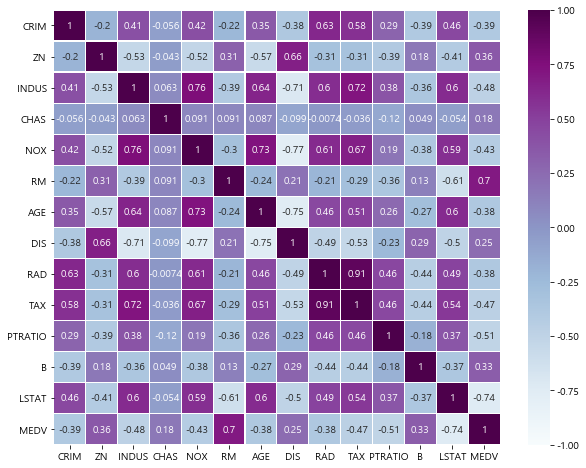

In [113]:
plt.figure( figsize=(10,8) )
sns.heatmap( boston_df.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, cmap='BuPu' ); plt.show()

In [119]:
vif = pd.DataFrame()
vif['VIF'] = [ variance_inflation_factor( boston_df.values, i ) for i in range( boston_df.shape[1] ) ]
vif['features'] = boston_df.columns
vif

,VIF,features
0,2.131404,CRIM
1,2.910004,ZN
2,14.485874,INDUS
3,1.176266,CHAS
4,74.004269,NOX
5,136.101743,RM
6,21.398863,AGE
7,15.430455,DIS
8,15.369980,RAD
9,61.939713,TAX


#### 연습문제

- 캘리 포니아 주택 가격을 이용하여 교차검증, 다중공선성을 확인한 후, 다중공선성이 높은 컬럼을 제외하고 학습하여 교차검증 값을 확인하시오.

#### 캘리포니아 주택 가격 데이터 Information

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 자치시(town)별 비소매 상업지역 토지 비율 |
| AveBedrms | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Population | 10,000,000당  일산화질소 농도 |
| AveOccup | 주택 1가구당 평균 방의 수 |
| Latitude | 1940년 이전에 건축된 소유주택 비율 |
| Longitude | 5개의 보스턴 고용 센터까지의 가중 거리 |

#### Code 한눈에 보기

In [ ]:
cal             = fetch_california_housing()
cal_df          = pd.DataFrame(cal.data, columns=cal.feature_names)
cal_df['Price'] = cal.target

# 상관관계
plt.figure( figsize=(10,8) )
sns.heatmap( cal_df.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, cmap='BuPu' ); plt.show()

calVIF             = pd.DataFrame()
calVIF['VIF']      = [ variance_inflation_factor( cal_df.values, i ) for i in range( cal_df.shape[1] ) ]
calVIF['features'] = cal_df.columns
calVIF

# 서로 연관성 깊은 변수 한개씩만 제거.
cal_df2             = cal_df[ cal_df.columns.difference(['MedInc','AveBedrms', 'Longitude']) ]
calVIF2             = pd.DataFrame()
calVIF2['VIF']      = [ variance_inflation_factor( cal_df2.values, i ) for i in range( cal_df2.shape[1] ) ]
calVIF2['features'] = cal_df2.columns
calVIF2

# 10이상 VIF 지수 가지는 변수 제거. -> 'Latitude' 추가
cal_df3             = cal_df[ cal_df.columns.difference(['MedInc','AveBedrms', 'Longitude', 'Latitude']) ]
calVIF3             = pd.DataFrame()
calVIF3['VIF']      = [ variance_inflation_factor( cal_df3.values, i ) for i in range( cal_df3.shape[1] ) ]
calVIF3['features'] = cal_df3.columns
calVIF3


# 교차 검증....?? 올바른 결과인가?
x_data  = cal_df3.iloc[:,:-1]
y_data  = cal_df3.iloc[:, -1]
model   = make_pipeline( StandardScaler(), LinearRegression() )
r2score = cross_val_score( model, x_data, y_data, cv=10, scoring='r2', verbose=1)  
print( r2score )
print( r2score.mean() )


## 학습하기.
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2,random_state=1 )
model.fit( x_train, y_train )
print(f'train data R2 : { model.score( x_train , y_train ) }' )
print(f'test data R2 : { model.score( x_test , y_test ) }' )

## 결과는 만족스럽지 못함... 즉각적인 변수제거 방법은 별로 좋아보이지 않음.
## 차원축소 방법을 통한 공선성 제거를 기대해보는 것이 좋아 보임.

In [155]:
cal    = fetch_california_housing()
cal_df = pd.DataFrame(cal.data, columns=cal.feature_names)
cal_df['Price'] = cal.target
cal_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


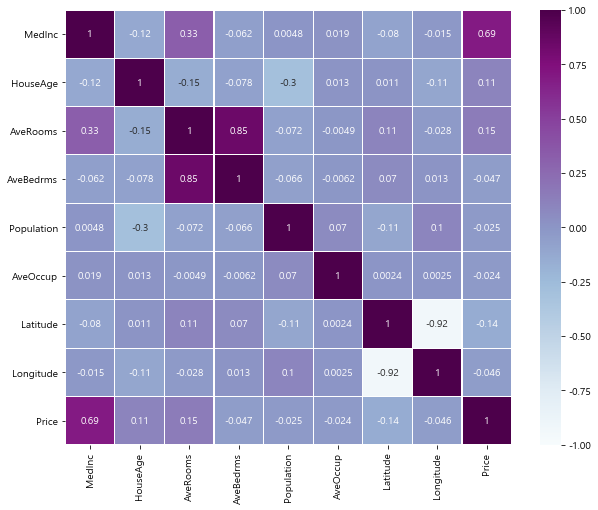

In [156]:
plt.figure( figsize=(10,8) )
sns.heatmap( cal_df.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, cmap='BuPu' ); plt.show()

In [165]:
x_data  = cal_df.iloc[:,:-1]
y_data  = cal_df.iloc[:, -1]
model   = make_pipeline( StandardScaler(), LinearRegression() )
r2score = cross_val_score( model, x_data, y_data, cv=10, scoring='r2', verbose=1)  
print( r2score )
print( r2score.mean() )

[0.48254494 0.61416063 0.42274892 0.48178521 0.55705986 0.5412919
 0.47496038 0.45844938 0.48177943 0.59528796]
0.5110068610524554


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [157]:
calVIF             = pd.DataFrame()
calVIF['VIF']      = [ variance_inflation_factor( cal_df.values, i ) for i in range( cal_df.shape[1] ) ]
calVIF['features'] = cal_df.columns
calVIF

,VIF,features
0,19.624998,MedInc
1,7.592663,HouseAge
2,47.956351,AveRooms
3,45.358192,AveBedrms
4,2.936078,Population
5,1.099530,AveOccup
6,568.497332,Latitude
7,640.064211,Longitude
8,9.285659,Price


In [158]:
cal_df2             = cal_df[ cal_df.columns.difference(['MedInc','AveBedrms', 'Longitude']) ]
calVIF2             = pd.DataFrame()
calVIF2['VIF']      = [ variance_inflation_factor( cal_df2.values, i ) for i in range( cal_df2.shape[1] ) ]
calVIF2['features'] = cal_df2.columns
calVIF2

,VIF,features
0,1.095045,AveOccup
1,6.333040,AveRooms
2,6.979517,HouseAge
3,18.182280,Latitude
4,2.780785,Population
5,4.301634,Price


In [159]:
cal_df3             = cal_df[ cal_df.columns.difference(['MedInc','AveBedrms', 'Longitude', 'Latitude']) ]
calVIF3             = pd.DataFrame()
calVIF3['VIF']      = [ variance_inflation_factor( cal_df3.values, i ) for i in range( cal_df3.shape[1] ) ]
calVIF3['features'] = cal_df3.columns
calVIF3

,VIF,features
0,1.094209,AveOccup
1,4.049803,AveRooms
2,3.705824,HouseAge
3,2.103699,Population
4,4.137874,Price


In [167]:
x_data  = cal_df3.iloc[:,:-1]
y_data  = cal_df3.iloc[:, -1]
model   = make_pipeline( StandardScaler(), LinearRegression() )
r2score = cross_val_score( model, x_data, y_data, cv=10, scoring='r2', verbose=1)  
print( r2score )
print( r2score.mean() )

[-0.34293393 -0.32648583 -0.01593999  0.10603612 -0.07164817 -0.09129106
 -0.97241306  0.069965   -0.63723898 -0.33797483]
-0.2619924734380744


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
